In [232]:
import pandas as pd
import numpy as np
# import swifter

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white' # Since I use a dark IDE

# To allow multiple outputs per cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [233]:
wba_data = pd.read_csv('WBA_data.csv')

In [234]:
colnames = wba_data.columns

In [235]:
wba_data.shape

(239, 146)

In [236]:
wba_data.describe()

,Subject,Gender,AgeM,AgeY,Unnamed: 15,Lang3,Unnamed: 19,PTA0.5,PTA1,PTA2,...,f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000)
count,239.000000,239.000000,239.000000,239.000000,186.000000,0.0,217.000000,239.0,239.0,239.0,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,247.652720,0.435146,106.426778,8.868898,0.204301,NaN,0.129032,20.0,20.0,20.0,...,0.226722,0.205663,0.177513,0.177768,0.177903,0.163525,0.158900,0.153566,0.161936,0.144212
std,137.757005,0.496817,8.507157,0.708930,0.404278,NaN,0.336011,0.0,0.0,0.0,...,0.212096,0.199763,0.190303,0.184442,0.173567,0.166493,0.159699,0.165423,0.167189,0.180419
min,8.000000,0.000000,93.000000,7.750000,0.000000,NaN,0.000000,20.0,20.0,20.0,...,-0.258800,-0.230500,-0.223100,-0.190000,-0.144900,-0.125100,-0.096500,-0.099900,-0.086000,-0.116400
25%,119.500000,0.000000,100.000000,8.333333,0.000000,NaN,0.000000,20.0,20.0,20.0,...,0.073850,0.060250,0.029500,0.032900,0.039700,0.033550,0.040650,0.026950,0.035650,0.015400
50%,230.000000,0.000000,104.000000,8.666667,0.000000,NaN,0.000000,20.0,20.0,20.0,...,0.207300,0.193000,0.165800,0.154600,0.147700,0.133100,0.125500,0.118100,0.115500,0.109400
75%,369.500000,1.000000,114.000000,9.500000,0.000000,NaN,0.000000,20.0,20.0,20.0,...,0.362350,0.329050,0.288850,0.268550,0.276250,0.263550,0.253050,0.253050,0.256650,0.249400
max,496.000000,1.000000,129.000000,10.750000,1.000000,NaN,1.000000,20.0,20.0,20.0,...,0.935300,0.916400,0.897900,0.895400,0.879700,0.855800,0.816600,0.774000,0.772400,0.856400


## Control Variables

In [237]:
def update_colnames():
    colnames = [c for c in wba_data.columns if c[:2] != "f("]
    return colnames

In [238]:
colnames = update_colnames()

Deleting language columns

In [239]:
lang_cols = [c for c in colnames if c[0:4] == "Lang"]
print("Deleting columns {}".format(lang_cols))
wba_data = wba_data.drop(lang_cols, axis=1)

Deleting columns ['Lang1', 'Lang2', 'Lang3']


Deleting unnamed columns

In [240]:
unnamed_cols = [c for c in colnames if c[:7] == "Unnamed"]
print("Deleting columns {}".format(unnamed_cols))
wba_data = wba_data.drop(unnamed_cols, axis=1)

Deleting columns ['Unnamed: 15', 'Unnamed: 19', 'Unnamed: 49', 'Unnamed: 55', 'Unnamed: 64']


In [241]:
colnames = update_colnames()
print([c for c in colnames])

['Subject', 'Gender', 'DOT', 'DOB', 'AgeM', 'AgeY', 'Eth1', 'Eth2', 'PTA0.5', 'PTA1', 'PTA2', 'PTA4', 'PTAAv4FA', 'PTAAv4FAPoF', 'PTAAv4FAPoFC', 'ECV', 'TPP', 'SC', 'TympType', 'TympPoF', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4', 'OAEPoF', 'OAEPoFC', 'OverallPoF', 'EarSide', 'Ear coded', 'Pressure']


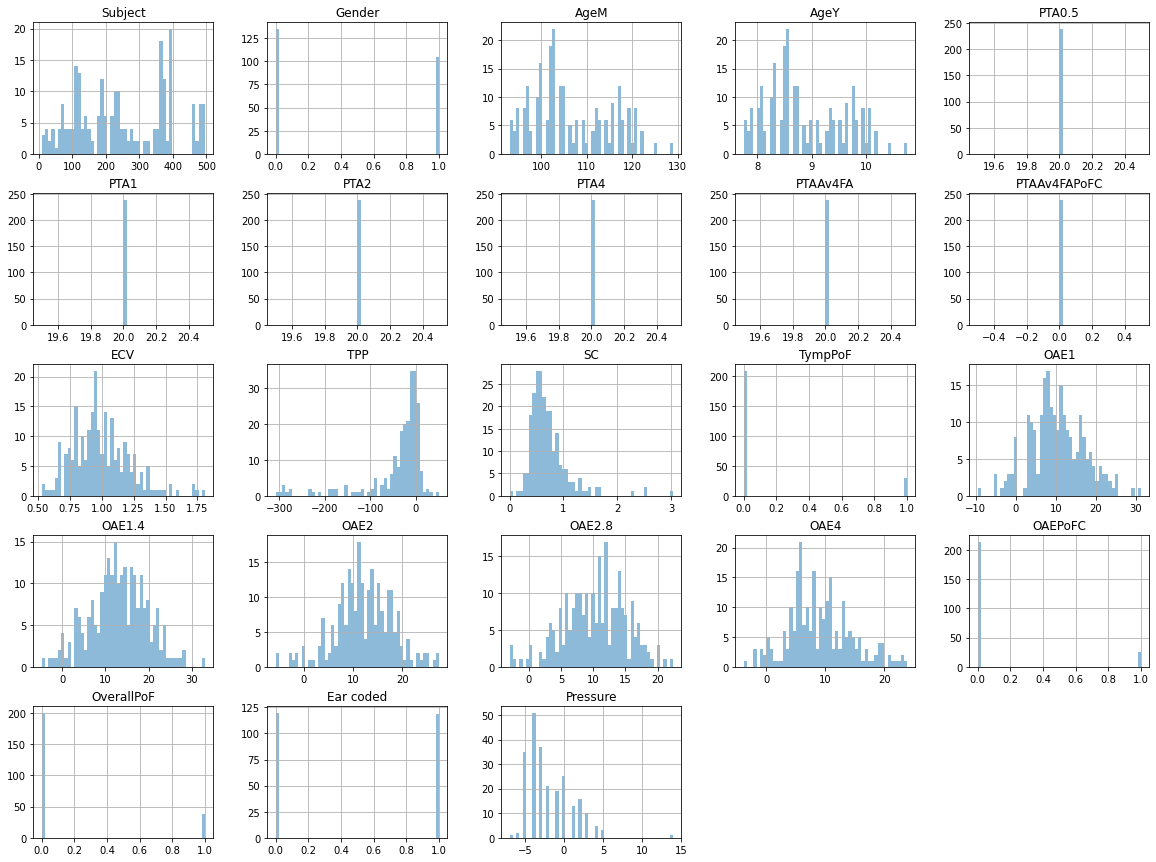

In [242]:
hist_control = wba_data[colnames].hist(
    bins=50,
    figsize=(20,15),
    alpha = 0.5
    )

### Ethnicity

[None, None, None, None, None, None, None, None, None, None, None, None]

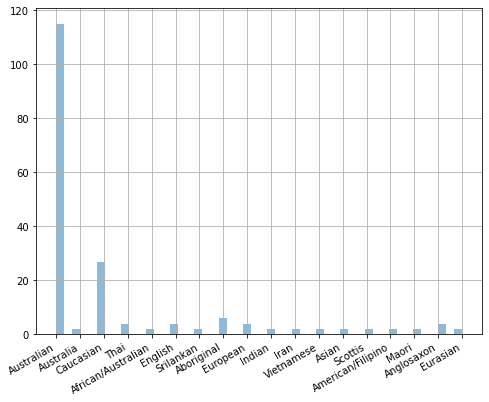

In [243]:
fig, ax = plt.subplots()
# ax = axes.flatten()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

hist_all = wba_data['Eth1'].hist(
    bins=50,
    figsize=(8,6),
    alpha = 0.5
    )


Unfortunately it seems that there are not enough observations of each ethnicity (besides Australian/Caucasian) to effectively use the ethnicity columns. 

In [244]:
wba_data = wba_data.drop(['Eth1', 'Eth2'], axis=1)
colnames = update_colnames()

### Remaining NA Values

In [245]:
wba_data[colnames].columns[wba_data[colnames].isna().any()].tolist()

['TPP', 'SC']

In [253]:
np.nanmean(wba_data['TPP'])

-40.07203389830509

In [ ]:
for col in ['TPP', 'SC']:
    wba_data.loc[wba_data[col].isna(), col] = 0

## WBA Columns

In [246]:
freq_colnames = [c for c in wba_data.columns if c[:2] == "f("]

### Histograms

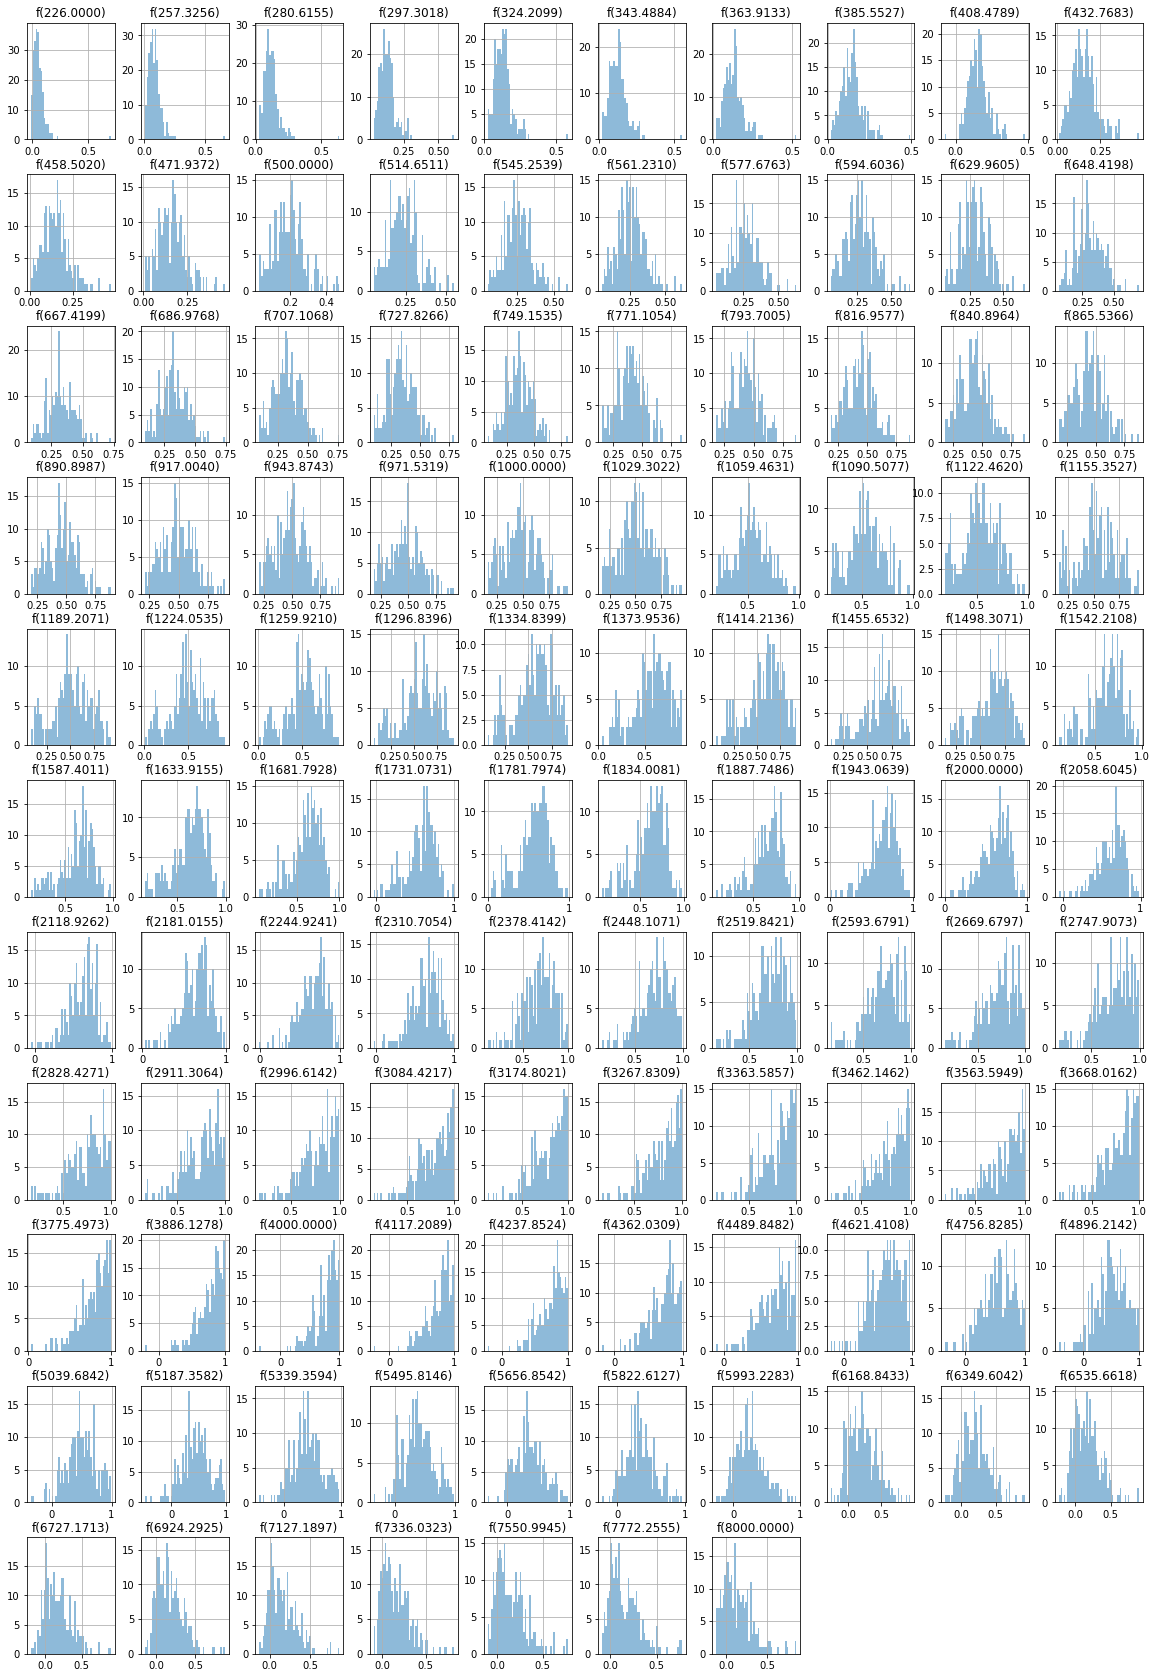

In [247]:
hist_freq = wba_data[freq_colnames].hist(
    bins=50,
    figsize=(20,30),
    alpha = 0.5
    )

### NA and Negative Values

Checking for NA values

In [248]:
wba_data[freq_colnames].columns[wba_data[freq_colnames].isna().any()].tolist()

[]

No NA Values.\
\
Checking for negative values

In [249]:
wba_data[freq_colnames].lt(0).any().any()

True

A `True` result means that negative values exist. Looping through each frequency and replacing negative values with `0`.

In [250]:
for freq in freq_colnames:
    wba_data.loc[wba_data[freq] < 0, freq] = 0

In [251]:
wba_data[freq_colnames].lt(0).any().any()

False